In [1]:
#Import scikit
#From scikit import svm, randomforest, crossvalidation
#Import xarray
#import numpy

import os
import sys
import csv
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix as cmat
import collections
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as report  
from sklearn.model_selection import *
from sklearn.feature_selection import *
import matplotlib.pyplot as plt
import time
import random
import numpy
from datetime import datetime
import pandas as pd
import requests
import re
import xarray as xr
import pickle

In [5]:
papa_ctd = pd.read_pickle('papa_file.pkl')
papa_ctd = papa_ctd.reset_index()

gs_ctd = pd.read_pickle('gs_file.pkl')
gs_ctd = gs_ctd.reset_index()


In [10]:
papa_rows = papa_ctd.shape
papa_rows[0]

gs_rows = gs_ctd.shape
gs_rows[0]

total_rows = papa_rows[0] + gs_rows[0]
total_rows

363467

In [7]:
list(gs_ctd.columns.values)
gs_ctd

,index,ctdpf_ckl_seawater_temperature,practical_salinity,ctdpf_ckl_seawater_conductivity,density,Label
0,"(-0.001, 10.0]",5.418282,32.849675,3.206697,1027.109361,0
1,"(10.0, 20.0]",5.419480,32.850220,3.206842,1027.108962,0
2,"(20.0, 30.0]",5.419411,32.850547,3.206857,1027.108363,0
3,"(30.0, 40.0]",5.418445,32.850835,3.206791,1027.107849,0
4,"(40.0, 50.0]",5.418960,32.851206,3.206864,1027.107667,0
5,"(50.0, 60.0]",5.419167,32.851362,3.206891,1027.107298,0
6,"(60.0, 70.0]",5.419418,32.851692,3.206936,1027.106943,0
7,"(70.0, 80.0]",5.419200,32.851844,3.206924,1027.106347,0
8,"(80.0, 90.0]",5.418478,32.852085,3.206878,1027.106066,0
9,"(90.0, 100.0]",5.418009,32.852372,3.206855,1027.105478,0


In [8]:
#Concatenate datas:
full_data = [papa_ctd,gs_ctd]

full_data = pd.concat(full_data)

#Creating a shuffled DataFrame with new indices:
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data = full_data.fillna(0)
#full_data

In [18]:
full_data = full_data.drop(['index'], axis=1)

In [19]:
full_rows = full_data.shape
assert full_rows[0] == total_rows

In [30]:
total_rows

363467

In [20]:
#Divide sets between training and validation

divide_point = int(.2*full_rows[0]) #Divide 20% predict, 80% train

learn_set = full_data.iloc[divide_point:,:]
predict_set = full_data.iloc[:divide_point,:]


number_of_features = 4

tr_X = learn_set.iloc[:,0:number_of_features]
tr_y = learn_set.iloc[:,number_of_features:number_of_features+1]
tr_y = tr_y.values.ravel()

pr_X = predict_set.iloc[:,0:number_of_features]
pr_y = predict_set.iloc[:,number_of_features:number_of_features+1]
pr_y = pr_y.values.ravel()

In [22]:
tr_y

array([1, 1, 0, ..., 0, 1, 0])

In [35]:
#SVM:

# Train model

svm2 = svm.SVC(C=0.1).fit(tr_X, tr_y)

# Predict 

svm2_pred = svm2.predict(pr_X)   

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18224    23]
 [    0 54446]]
             precision    recall  f1-score   support

 Papa Data:       1.00      1.00      1.00     18247
   GS Data:       1.00      1.00      1.00     54446

avg / total       1.00      1.00      1.00     72693



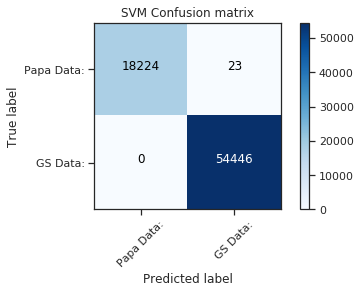

In [37]:
#Results:
target_names = ['Papa Data:','GS Data:']
cnf_matrix = cmat(pr_y, svm2_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='SVM Confusion matrix')


print(report(pr_y, svm2_pred,target_names=target_names))

# Cross Validate

#scores = cross_val_score(svm2, pr_X, pr_y, cv=10,scoring='precision')
#print("SVM 10-fold:", scores)
#print("SVM 10-fold Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Assess prediction

# Visualize Decision boundary ? 

In [23]:
#RF:

rf1 = RandomForestClassifier(n_estimators=250,max_features='log2',\
                             class_weight='balanced_subsample',criterion='entropy',\
                             min_samples_leaf=.0004)

# Train model

rf1_fit = rf1.fit(tr_X, tr_y)

# Predict 

rf1_pred = rf1.predict(pr_X)     #Does not use the backbone information
rf1_result = rf1.score(pr_X,pr_y)

Confusion matrix, without normalization
[[18239     8]
 [    5 54441]]
Random Forest results report:
             precision    recall  f1-score   support

 Papa Data:       1.00      1.00      1.00     18247
   GS Data:       1.00      1.00      1.00     54446

avg / total       1.00      1.00      1.00     72693



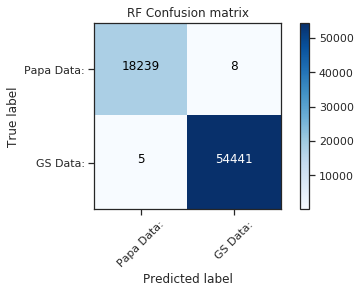

In [29]:
#Results:
target_names = ['Papa Data:','GS Data:']
cnf_matrix = cmat(pr_y,rf1_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='RF Confusion matrix')

print("Random Forest results report:")
print(report(pr_y, rf1_pred,target_names=target_names))   

# Cross Validate - Takes a long time.

#scores = cross_val_score(rf1, pr_X, pr_y, cv=10,scoring='precision')
#print("zm RF 10-fold:"), scores
#print("RF 10-fold Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Assess prediction

Text(0.5,1,'Feature importances')

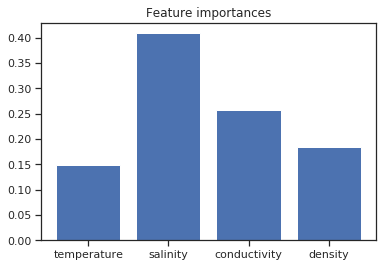

In [32]:
# Visualize feature importance

importances = rf1.feature_importances_
names = ['temperature','salinity','conductivity','density']

plt.bar(names,importances)
plt.title('Feature importances')
#names

In [39]:
#Import Altair
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [44]:
old_names = list(predict_set.columns.values)
old_names = old_names[0:4]
new_names = names

In [57]:
namesDict = []
for i in range(4):
    namesDict.append( {old_names[i]:new_names[i]} )
namesDict

[{'ctdpf_ckl_seawater_temperature': 'temperature'},
 {'practical_salinity': 'salinity'},
 {'ctdpf_ckl_seawater_conductivity': 'conductivity'},
 {'density': 'density'}]

In [61]:
predict_set.rename(columns = namesDict)

TypeError: 'list' object is not callable

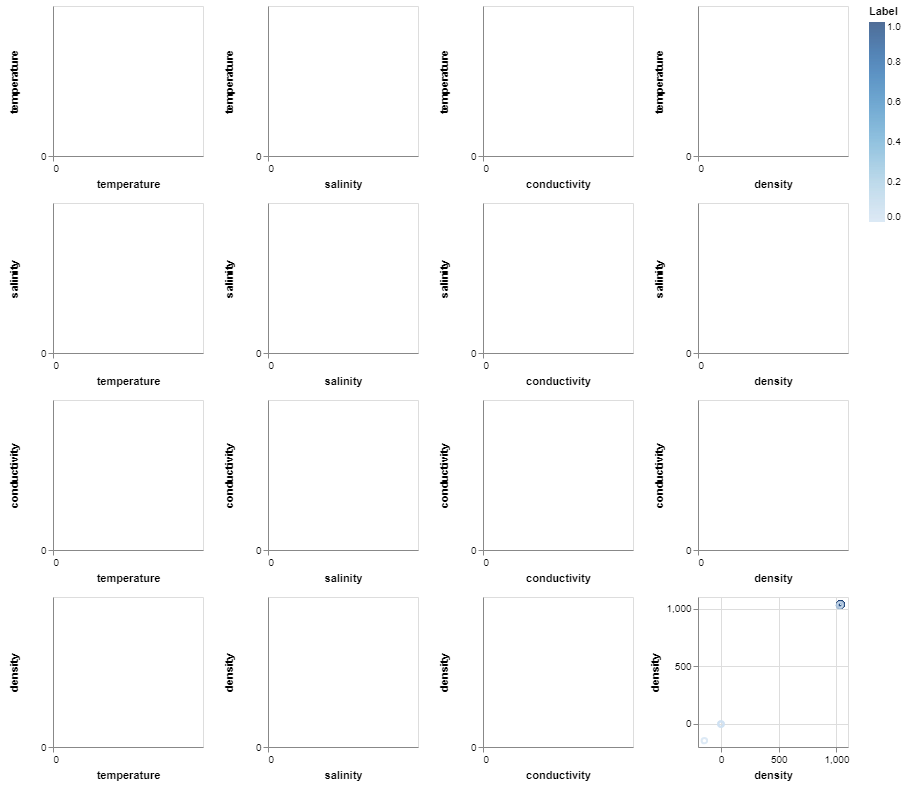

In [41]:
#Data set exploration
alt.Chart(predict_set[0:4000]).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Label'
).properties(
    width=150,
    height=150
).repeat(
    row=['temperature','salinity','conductivity','density'],
    column=['temperature','salinity','conductivity','density'])

In [33]:
predict_set.shape

(72693, 5)

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


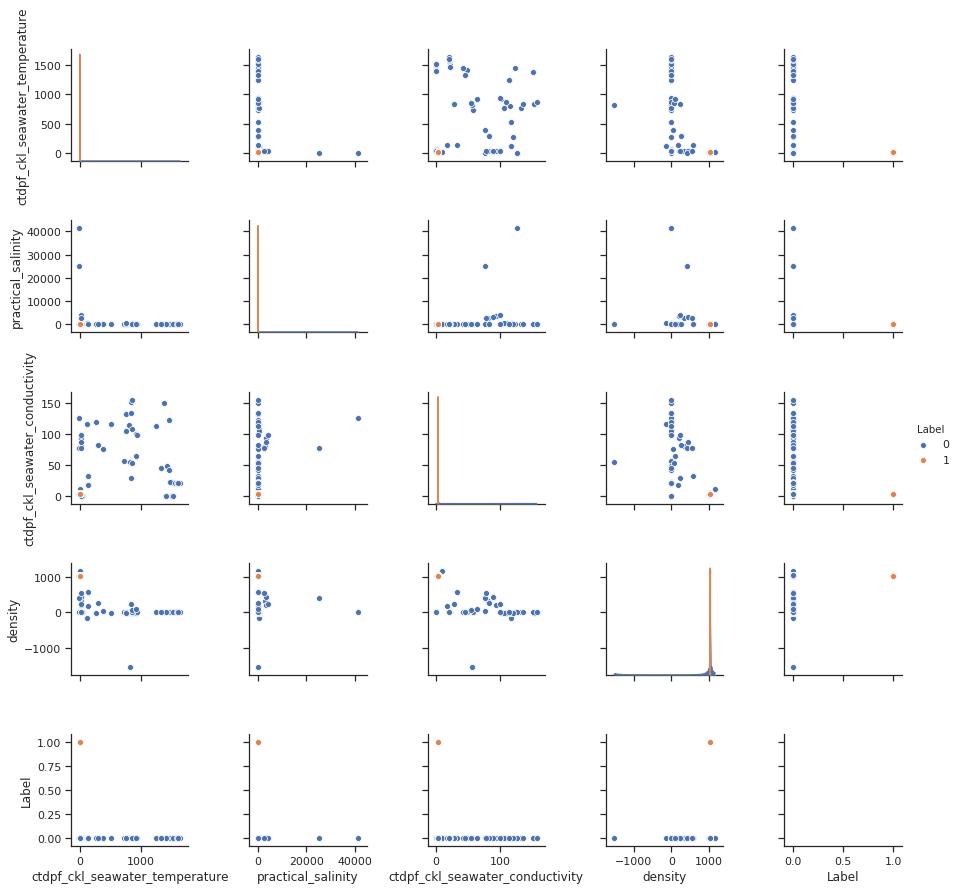

In [34]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(predict_set, hue='Label')